In [15]:
# Python
import pandas as pd
from prophet import Prophet


In [16]:
# Python
df = pd.read_csv('DOGE-USD.csv')
df.head()

,ds,y
0,2017-11-09,0.001415
1,2017-11-10,0.001431
2,2017-11-11,0.001257
3,2017-11-12,0.001210
4,2017-11-13,0.001212


In [17]:
m = Prophet(
    changepoint_prior_scale=0.2, # increasing it will make the trend more flexible
    changepoint_range=0.9, # place potential changepoints in the first 98% of the time series
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='additive'
)
m.fit(df)

/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -15.3601


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3388.33     0.0362835       1050.18           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3490.74    0.00967106       1233.25     0.04714           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3577.69     0.0037024       129.049      0.2922      0.2922      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3596.97      0.161535       1247.07           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3612.59     0.0867438       401.577           1           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599    

In [18]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1892,2023-01-14
1893,2023-01-15
1894,2023-01-16
1895,2023-01-17
1896,2023-01-18


In [19]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
1892,2023-01-14,-0.024937,-0.500622,0.432390
1893,2023-01-15,-0.025489,-0.494746,0.440947
1894,2023-01-16,-0.025669,-0.494675,0.442559
1895,2023-01-17,-0.026006,-0.500217,0.447607
1896,2023-01-18,-0.025168,-0.510397,0.444979


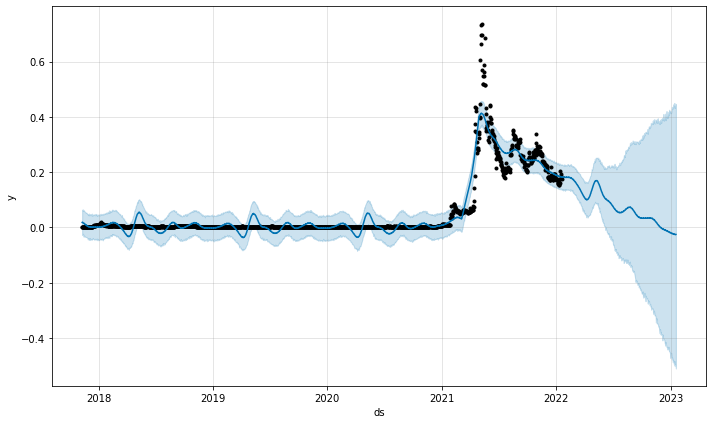

In [20]:
# Python
fig1 = m.plot(forecast)


/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



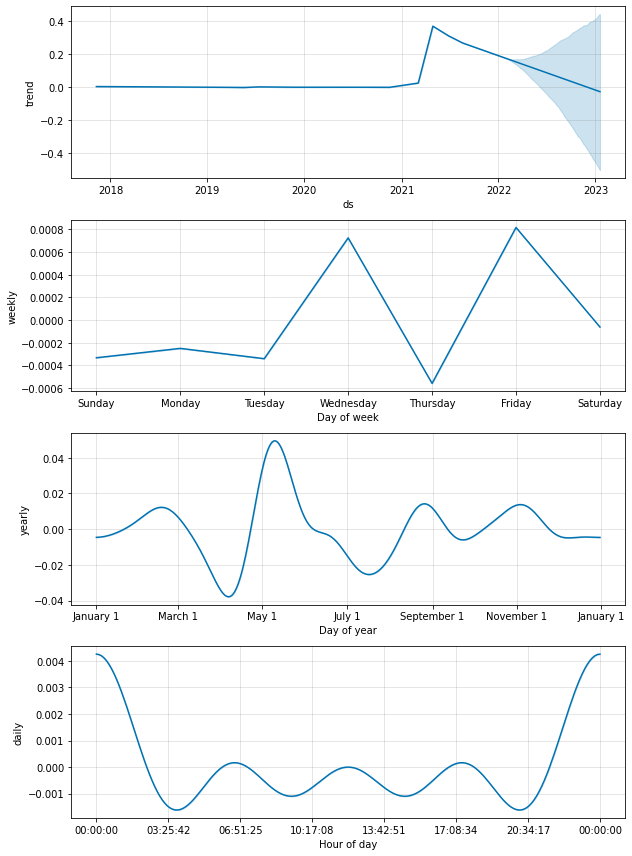

In [21]:
# Python
fig2 = m.plot_components(forecast)


In [22]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 11, 9, 0, 0),
                          datetime.datetime(2017, 11, 10, 0, 0),
                          datetime.datetime(2017, 11, 11, 0, 0), ...,
                          datetime.datetime(2022, 1, 16, 0, 0),
                          datetime.datetime(2022, 1, 17, 0, 0),
                          datetime.datetime(2022, 1, 18, 0, 0)], dtype=object),
              'y': array([0.001415, 0.001431, 0.001257, ..., 0.185093, 0.177872, 0.173651])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 11, 9, 0, 0),
                          datetime.datetime(2017, 11, 10, 0, 0),
                          datetime.datetime(2017, 11, 11, 0, 0), ...,
                          datetime.datetime(2023, 1, 16, 0, 0),
                          datetime.datetime(2023, 1, 17, 0, 0),
                          datetime.datetime(2023, 1, 18, 0, 0)], dtype=object),
              'y': array([-0.02736961, -0.02323102, -0.02556993, ..., -0.49467473, -0.50021655,
                          -0.51039745])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 11, 9, 0, 0),
                          datetime.datetime(2017, 11, 10, 0, 0),
                          datetime.datetime(2017, 11, 11, 0, 0), ...,
                          datetime.datetime(2023, 1, 16, 0, 0),
                          datetime.datetime(2023, 1, 17, 0, 0),
                          datetime.datetime(2023, 1, 18, 0, 0)], dtype=object),
              'y': array([ 0.01839416,  0.019241  ,  0.01775499, ..., -0.02566915, -0.02600586,
                          -0.0251684 ])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 11, 9, 0, 0),
                          datetime.datetime(2017, 11, 10, 0, 0),
                          datetime.datetime(2017, 11, 11, 0, 0), ...,
                          datetime.datetime(2023, 1, 16, 0, 0),
                          datetime.datetime(2023, 1, 17, 0, 0),
                          datetime.datetime(2023, 1, 18, 0, 0)], dtype=object),
              'y': array([0.063144  , 0.06552768, 0.06056249, ..., 0.44255854, 0.44760693,
                          0.44497933])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {'visible': True},
               

In [ ]:
# Python
plot_components_plotly(m, forecast)


/home/kar7mp5/.local/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'trend',
              'type': 'scatter',
              'x': array([datetime.datetime(1907, 10, 1, 0, 0),
                          datetime.datetime(1907, 11, 1, 0, 0),
                          datetime.datetime(1907, 12, 1, 0, 0), ...,
                          datetime.datetime(2023, 2, 27, 0, 0),
                          datetime.datetime(2023, 2, 28, 0, 0),
                          datetime.datetime(2023, 3, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.51590611, 10.51735651, 10.51876012, ..., 13.33989904, 13.33998576,
                          13.34007248]),
              'yaxis': 'y'},
             {'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_upper',
              'type': 'scatter',
              'x': array([datetime.datetime(1907, 10, 1, 0, 0),
                          datetime.datetime(1907, 11, 1, 0, 0),
                          datetime.datetime(1907, 12, 1, 0, 0), ...,
                          datetime.datetime(2023, 2, 27, 0, 0),
                          datetime.datetime(2023, 2, 28, 0, 0),
                          datetime.datetime(2023, 3, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.51590611, 10.51735651, 10.51876012, ..., 13.33989904, 13.33998576,
                          13.34007248]),
              'yaxis': 'y'},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_lower',
              'type': 'scatter',
              'x': array([datetime.datetime(1907, 10, 1, 0, 0),
                          datetime.datetime(1907, 11, 1, 0, 0),
                          datetime.datetime(1907, 12, 1, 0, 0), ...,
                          datetime.datetime(2023, 2, 27, 0, 0),
                          datetime.datetime(2023, 2, 28, 0, 0),
                          datetime.datetime(2023, 3, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.51590611, 10.51735651, 10.51876012, ..., 13.33983767, 13.33992399,
                          13.34001032]),
              'yaxis': 'y'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0, 59, 178082),
                          datetime.datetime(2017, 1, 3, 0, 1, 58, 356164), ...,
                          datetime.datetime(2017, 12, 29, 5, 57, 2, 465753),
                          datetime.datetime(2017, 12, 30, 5, 58, 1, 643835),
                          datetime.datetime(2017, 12, 31, 5, 59, 0, 821917)], dtype=object),
              'xaxis': 'x2',
              'y': array([-15.51653143, -16.19214757, -16.85277031, ..., -13.4718062 ,
                          -14.14916639, -14.83312973]),
              'yaxis': 'y2'}],
    'layout': {'height': 400,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'anchor': 'y',
                         'domain': [0.0, 1.0],
                         'range': [1901-12-23 06:00:00, 2028-12-06 18:00:00],
                         'type': 'date'},
               'xaxis2': {'anchor': 'y2',
                          'domain': [0.0, 1.0],
                          'range': [2016-12-13 18:54:02.958904115, 2018-01-18
                                    11:04:57.863013581],
                          'tickformat': '%B %e',
                          'type': 'date'},
               'yaxis': {'anchor': 'x',
                         'domain': [0.575, 1.0],
                         'rangemode': 'normal',
      